## Calculating the Return of a Portfolio of Securities

In [1]:
#Importing needed libraries and extracting our data for our portfolio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [15]:
#In this case, I'm creating a portfolio composed by 5 different stocks, and every one of them has the same weight: 1/5

tickers = ['BP', 'F', 'AMZN', 'AAPL', 'MCD']
portfolio_data = pd.DataFrame()
for t in tickers:
    portfolio_data[t] = wb.DataReader(t, 'yahoo', start = ('2000/1/1'))['Adj Close']
    
#Checking if information is complete and accurate    
    
portfolio_data.tail()    

,BP,F,AMZN,AAPL,MCD
Date,,,,,
2019-05-30,41.029999,9.74,1816.319946,178.300003,198.080002
2019-05-31,40.720001,9.52,1775.069946,175.070007,198.270004
2019-06-03,41.040001,9.61,1692.689941,173.300003,198.779999
2019-06-04,41.360001,9.92,1729.560059,179.639999,199.630005
2019-06-05,41.040001,9.78,1738.500000,182.539993,200.130005


In [19]:
portfolio_data.head()

,BP,F,AMZN,AAPL,MCD
Date,,,,,
2000-01-03,24.838348,15.798207,89.3750,2.655498,24.247896
2000-01-04,24.706383,15.270343,81.9375,2.431611,23.750698
2000-01-05,25.551050,15.326898,69.7500,2.467196,24.133152
2000-01-06,25.603836,15.345757,65.5625,2.253689,23.788942
2000-01-07,25.128702,16.476889,69.5625,2.360442,24.400881


In [17]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4886 entries, 2000-01-03 to 2019-06-05
Data columns (total 5 columns):
BP      4886 non-null float64
F       4886 non-null float64
AMZN    4886 non-null float64
AAPL    4886 non-null float64
MCD     4886 non-null float64
dtypes: float64(5)
memory usage: 229.0 KB


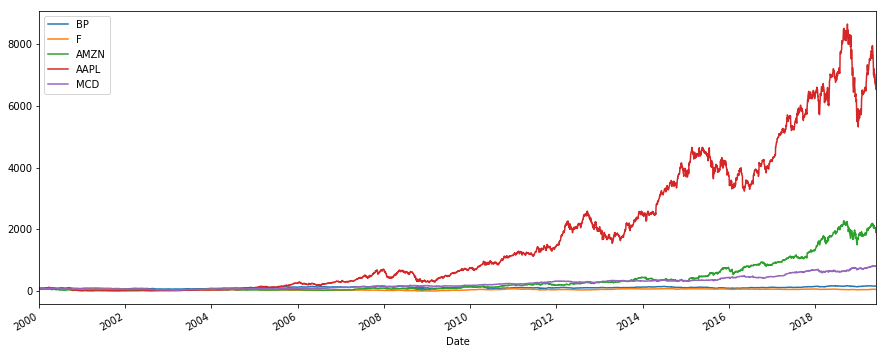

In [20]:
#Normalizing to 100 and plotting data on a graph
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (15,6));

### Calculating the Return of a Portfolio of Securities

In [22]:
#Creating our daily returns table
returns = (portfolio_data / portfolio_data.shift(1)) - 1
returns.tail()

,BP,F,AMZN,AAPL,MCD
Date,,,,,
2019-05-30,-0.005815,0.003090,-0.001578,0.005187,0.016427
2019-05-31,-0.007555,-0.022587,-0.022711,-0.018116,0.000959
2019-06-03,0.007859,0.009454,-0.046409,-0.010110,0.002572
2019-06-04,0.007797,0.032258,0.021782,0.036584,0.004276
2019-06-05,-0.007737,-0.014113,0.005169,0.016143,0.002505


In [23]:
#Considering each stock wights 1/5 of our total portfolio, we create a numpy array with respective consideration

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

#If you desire to calculate different weights, you can also do it this way, just remember the weights should add 1 in total

In [25]:
#Obtaining average annual returns

annual_returns = returns.mean() * 250 #Trading days in a year
annual_returns

BP      0.064054
F       0.061614
AMZN    0.287880
AAPL    0.303043
MCD     0.134049
dtype: float64

In [28]:
#Calculating our portfolio rate of return by using the numpy's .dot method, that allow us to calculate matrices prducts right away

ROR = np.dot(annual_returns, weights)
ROR

0.17012793209830107

In [35]:
#Finally we give a propper presentation to our result

ROR_portfolio = str(round(ROR, 5) * 100) + '%'
'The return of the given portfolio is ' + ROR_portfolio

'The return of the given portfolio is 17.013%'